In [44]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy  
%load_ext autoreload
%autoreload 2

from consumption_saving import *
from Model import ReferenceDependenceClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
model = ReferenceDependenceClass()
model1 = deepcopy(model)

In [46]:
model.par.euler = True
model1.par.euler = False

In [47]:
value_function_employment_ConSav(model.par, model.sol)

In [48]:
value_function_employment_ConSav(model1.par, model1.sol)

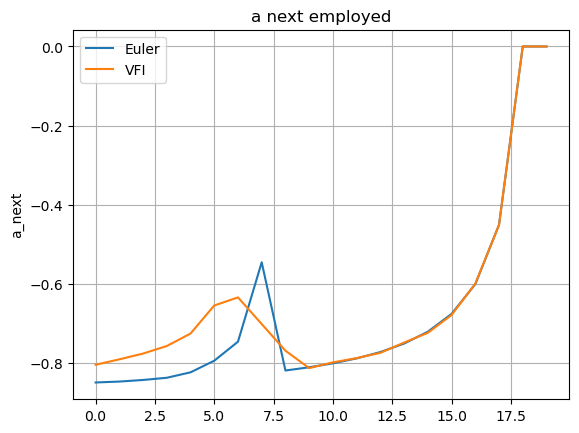

In [64]:
plt.plot(model.sol.a_next_e[10,:,0], label='Euler')
plt.plot(model1.sol.a_next_e[10,:,0], label='VFI')
plt.ylabel('a_next')
plt.title('a next employed')
plt.legend()
plt.grid(True)
plt.show()

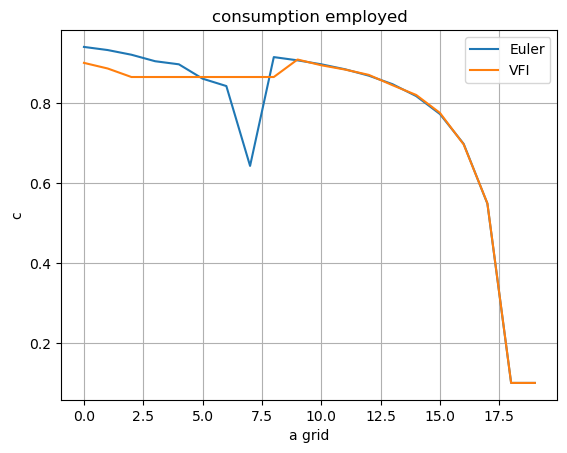

In [80]:
plt.plot(model.sol.c_e[2,:,0], label='Euler')
plt.plot(model1.sol.c_e[2,:,0], label='VFI')
plt.xlabel('a grid')
plt.ylabel('c')
plt.title('consumption employed')
plt.legend()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

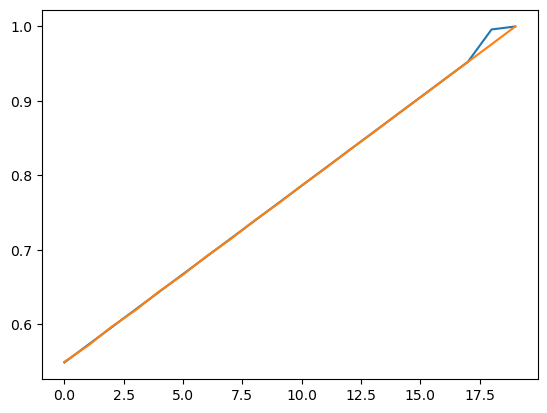

In [50]:
plt.plot(model.sol.c_e[-1,-3,:], label='euler')
plt.plot(model1.sol.c_e[-1,-3,:], label='no euler')
plt.legend

In [51]:
print(model.par.V_e[10,:,0])

[ 2.84276544e+00  1.71686393e+00  7.80646892e-01 -2.36396079e-02
 -6.69679822e-01 -1.16880587e+00 -1.60808321e+00 -2.19658617e+00
 -2.45262366e+00 -2.69565521e+00 -2.85002989e+00 -2.87049625e+00
 -2.89576911e+00 -2.93052663e+00 -2.98189822e+00 -3.06395720e+00
 -3.21567107e+00 -3.59335161e+00 -6.90775528e+00 -1.38155106e+03]


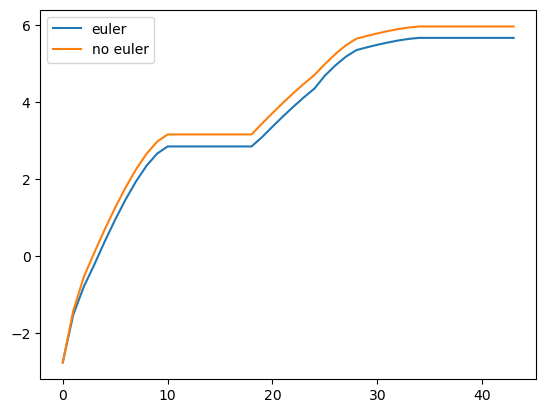

In [52]:
plt.plot(model.par.V_e[:, 0, 0], label='euler')
plt.plot(model1.par.V_e[:, 0, 0], label='no euler')
plt.legend()

In [53]:
s, V_u = unemployment_ss_ConSav(model.par, -1, 0, 0)
print(V_u, s)

-94.23593808994845 0.2930371712509497


In [54]:
s, V_u = unemployment_ss_ConSav(model1.par, -1, 0, 0)
print(V_u, s)

-93.94462335657725 0.2932812977557575


In [55]:
solve_search_and_consumption_ConSav(model.par, model.sol)

In [56]:
solve_search_and_consumption_ConSav(model1.par, model1.sol)

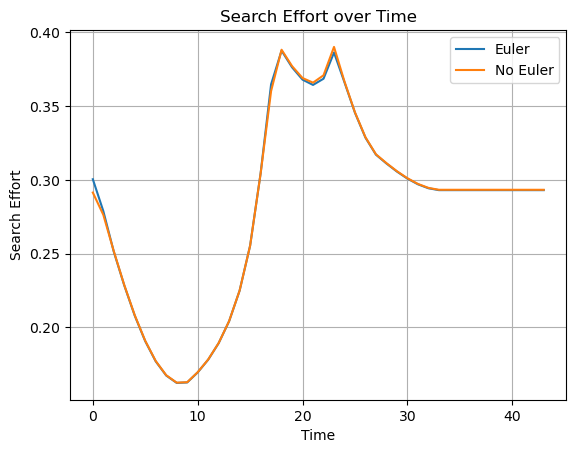

In [57]:

plt.plot(model.sol.s[0,:model.par.T,0], label='Euler')
plt.plot(model1.sol.s[0,:model.par.T,0], label='No Euler')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
model.solve_ConSav()

In [59]:
model1.solve_ConSav()

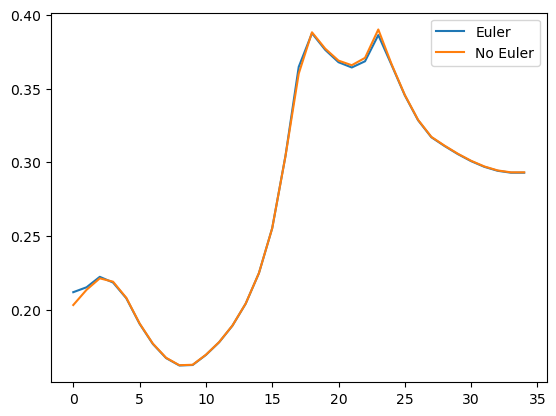

In [60]:
sim = model.sim.s_total
sim1 = model1.sim.s_total

plt.plot(sim, label='Euler')
plt.plot(sim1, label = 'No Euler')
plt.legend()

In [67]:
solve_forward_employment_ConSav(0, model.par, model.sol, model.sim)
solve_forward_employment_ConSav(0, model1.par, model1.sol, model1.sim)

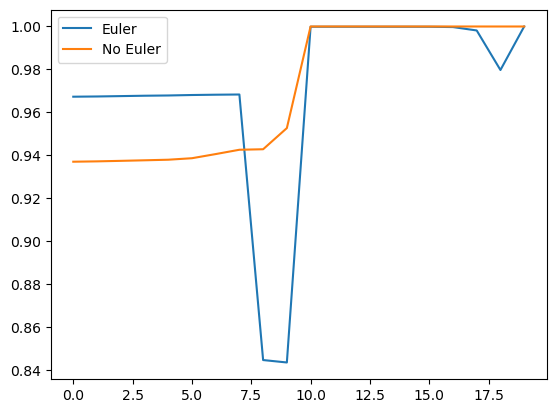

In [74]:
plt.plot(model.sim.c_e[2,:], label='Euler')
plt.plot(model1.sim.c_e[2,:], label='No Euler')
plt.legend()